In [1]:
psrname='J0613-0200'

In [2]:
epta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNTA/'+psrname+'/results/'
einpta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA+INPTA/SPNTA/'+psrname+'/results/'

In [3]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append('/media/root1/3PAR/sdandapat/work_dir/')
from diff_chain import  Diff_chain_shift

2023-04-16 02:40:56.963139: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 02:40:57.013835: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 02:40:57.015499: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 02:40:57.913693: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
par_epta_spnta=pd.read_csv(epta_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
lep=len(par_epta_spnta)
#par_epta_spnta

In [5]:
epta_spnta_1=np.loadtxt(epta_dir+'TNfinal-'+psrname+'-post_equal_weights.dat',usecols=(lep-4,lep-3,lep-2,lep-1,-1))

In [6]:
par_einpta_spnta=pd.read_csv(einpta_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
leinp=len(par_einpta_spnta)
#par_einpta_spnta

In [7]:
einpta_spnta_1=np.loadtxt(einpta_dir+'TNfinal-'+psrname+'-post_equal_weights.dat',usecols=(leinp-4,leinp-3,leinp-2,leinp-1,-1))

In [8]:
epta_spnta_arr=epta_spnta_1.T[0:4];einpta_spnta_arr=einpta_spnta_1.T[0:4]
epta_spnta_arr_red=epta_spnta_arr[0:2];einpta_spnta_arr_red=einpta_spnta_arr[0:2]
epta_spnta_arr_dm=epta_spnta_arr[2:4];einpta_spnta_arr_dm=einpta_spnta_arr[2:4]

In [9]:
loglike_spnta_epta=epta_spnta_1.T[-1];loglike_spnta_einpta=einpta_spnta_1.T[-1]

# Tension Considering red+dm

In [10]:
names = ['rn_logA','rn_gamma','dm_logA','dm_gamma']
labels=['\log A_R','\gamma_R', '\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA','delta_gamma']

epta=MCSamples(samples=np.array(epta_spnta_arr).transpose(),loglikes=loglike_spnta_epta,names=names,labels=labels,label='EPTA')
einpta=MCSamples(samples=np.array(einpta_spnta_arr).transpose(),loglikes=loglike_spnta_einpta,names = names,labels=labels,label='EPTA+INPTA \n'+psrname)

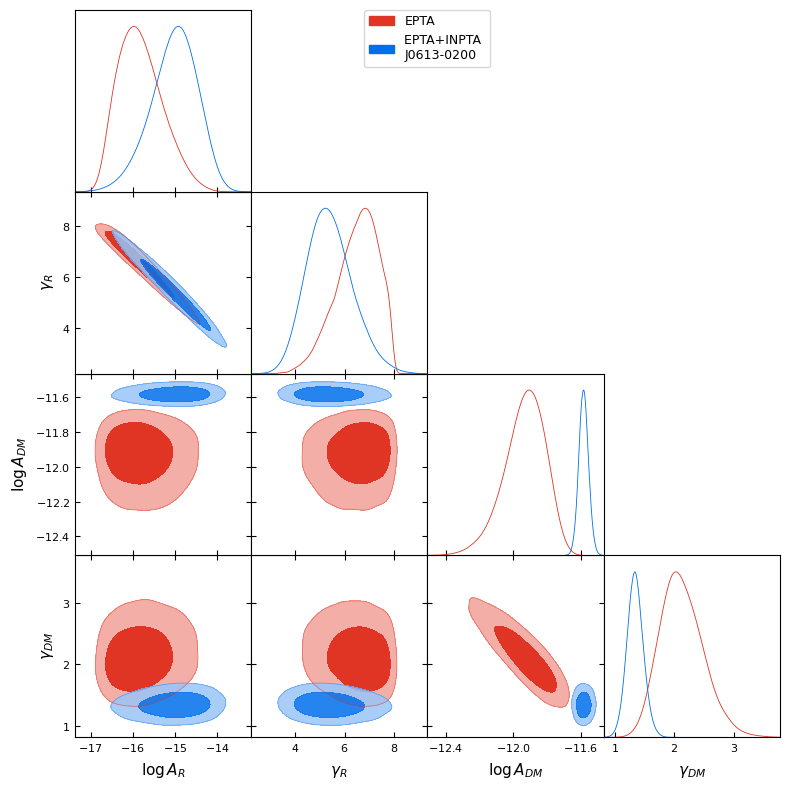

In [11]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta,einpta], filled=True)
plt.savefig(psrname+'_EPTAvsEINPTA_SPNTA_All.png',dpi=300)
plt.show()

In [12]:
# %matplotlib inline
# diff_chain, nsig, chi_2, D_B=Diff_chain_shift(epta,einpta)

In [13]:
# %matplotlib inline
# g = plots.get_subplot_plotter()
# #nsig=utilities.from_confidence_to_sigma(shift_probability)
# #getdist.plots.GetDistPlotSettings()
# g.triangle_plot(diff_chain, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
#                         str("{:.5f}".format(nsig))+' (-'+str("{:.5f}".format(D_B-nsig))
#                         +'\n+'+str("{:.5f}".format(nsig-chi_2))+') $\sigma$'],markers=[0,0,0,0])
# #g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
# plt.savefig(psrname+'_diff_EPTA+INPTA_SPNA_All.png',dpi=300)

# Tension considering red noise Only

In [14]:
names_red = ['rn_logA','rn_gamma']
labels_red=['\log A_R','\gamma_R']

In [15]:
epta_red=MCSamples(samples=np.array(epta_spnta_arr_red).transpose(),loglikes=loglike_spnta_epta,names=names_red,labels=labels_red,label='EPTA')
einpta_red=MCSamples(samples=np.array(einpta_spnta_arr_red).transpose(),loglikes=loglike_spnta_einpta,names = names_red,labels=labels_red,label='EPTA+INPTA \n'+psrname)

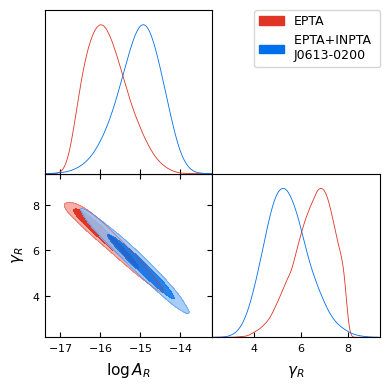

In [16]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta_red,einpta_red], filled=True)
plt.savefig(psrname+'_EPTA+INPTA_SPNTA_red.png',dpi=300)
plt.show()

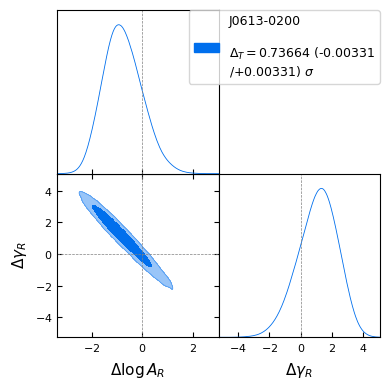

In [17]:
%matplotlib inline
diff_chain_red, nsig_red,sigl_red,sigu_red=Diff_chain_shift(epta_red,einpta_red)

g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_red, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.5f}".format(nsig_red))+' (-'+str("{:.5f}".format(sigu_red-nsig_red))
                        +'\n/+'+str("{:.5f}".format(nsig_red-sigl_red))+') $\sigma$'],markers=[0,0,0,0])

plt.savefig(psrname+'diff_EPTAvsEINPTA_SPNA_red.png',dpi=300)

# Tension considering dm noise only

In [18]:
names_dm = ['dm_logA','dm_gamma']
labels_dm=['\log A_{DM}','\gamma_{DM}']

In [19]:
epta_dm=MCSamples(samples=np.array(epta_spnta_arr_dm).transpose(),loglikes=loglike_spnta_epta,names=names_dm,labels=labels_dm,label='EPTA')
einpta_dm=MCSamples(samples=np.array(einpta_spnta_arr_dm).transpose(),loglikes=loglike_spnta_einpta,names = names_dm,labels=labels_dm,label='EPTA+INPTA \n'+psrname)

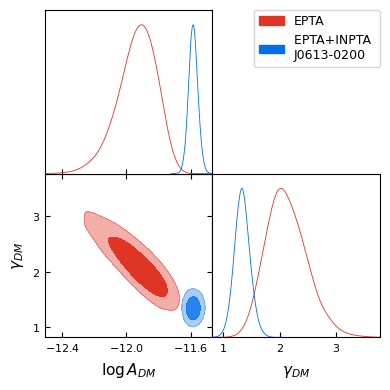

In [20]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta_dm,einpta_dm], filled=True)
plt.savefig(psrname+'_EPTAvsEINPTA_SPNTA_DM.png',dpi=300)
plt.show()

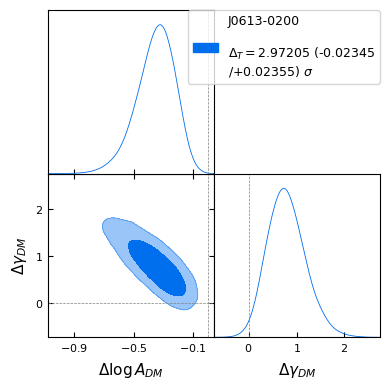

In [21]:
%matplotlib inline
diff_chain_dm, nsig_dm,sigl_dm,sigu_dm=Diff_chain_shift(epta_dm,einpta_dm)

g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_dm, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.5f}".format(nsig_dm))+' (-'+str("{:.5f}".format(sigu_dm-nsig_dm))
                        +'\n/+'+str("{:.5f}".format(nsig_dm-sigl_dm))+') $\sigma$'],markers=[0,0,0,0])

plt.savefig(psrname+'diff_EPTAvsEINPTA_SPNTA_dm.png',dpi=300)